# Walmart Weekly Sales Forecasting  
## Notebook 2: Feature Engineering and Modeling

**Objective:** Train multiple regression models to predict weekly sales and compare baseline performance.


In [5]:
import pandas as pd

# Load prepared dataset created in Notebook 1
#full_df = pd.read_csv("walmart_prepared.csv")
full_df= pd.read_csv("/content/sample_data/walmart_prepared.csv")
full_df.head()




,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,WeekOfYear,Lag_1_Week,Type_B
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,2010,2,5,0.00,False
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,2010,2,6,24924.50,False
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,2010,2,7,46039.49,False
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,2010,2,8,41595.55,False
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,2010,3,9,19403.54,False


## 7. Baseline Modeling

In this section, I build a baseline regression model using `RandomForestRegressor`.

- **Target:** `Weekly_Sales`
- **Features:** Store, Dept, holidays, time features, store size, economic variables, markdowns, and lagged sales.
- **Evaluation Metrics:** RMSE and R²


In [7]:
from sklearn.model_selection import train_test_split

# Define feature columns
feature_cols = [
    "Store", "Dept", "IsHoliday", "Temperature", "Fuel_Price",
    "CPI", "Unemployment", "Size", "Year", "Month", "WeekOfYear",
    "Lag_1_Week"
]

# Include encoded Type_ columns if present
type_cols = [c for c in full_df.columns if c.startswith("Type_")]
feature_cols += type_cols

# Drop rows with any remaining missing in selected columns (as a safeguard)
model_df = full_df.dropna(subset=feature_cols + ["Weekly_Sales"])

X = model_df[feature_cols]
y = model_df["Weekly_Sales"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_val.shape

((104857, 13), (26215, 13))

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Baseline Random Forest Performance")
print("RMSE:", rmse)
print("R²:", r2)

Baseline Random Forest Performance
RMSE: 5617.045112630026
R²: 0.9490428815730408


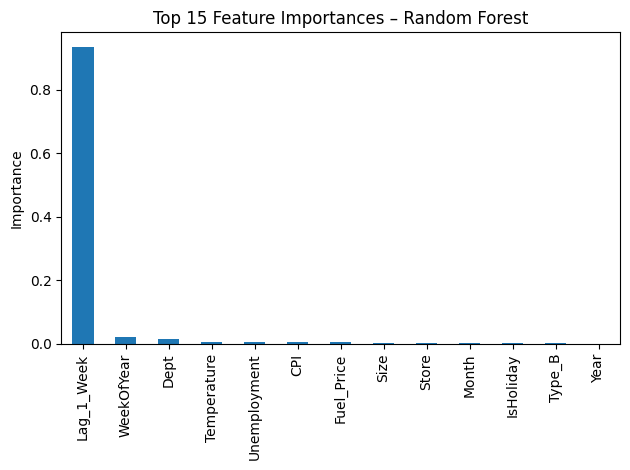

In [11]:
#Feature Importance
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances.sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances – Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Additional Models (for comparison)

To meet the project requirement of comparing multiple regression models, the following additional models are trained and evaluated using the same train/test split:
- Linear Regression
- Gradient Boosting Regressor


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define target column
target_col = "Weekly_Sales"

# Reuse existing split variables if they exist; otherwise create them
# X_train, X_val, y_train, y_val are already defined from cell 58728eb0
# We will use X_val and y_val for evaluation consistency

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": rf,
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []
for name, model in models.items():
    # Random Forest already fitted above; refit others for consistency
    if name != "Random Forest":
        model.fit(X_train, y_train)
    preds = model.predict(X_val) # Changed X_test to X_val
    rmse = np.sqrt(mean_squared_error(y_val, preds)) # Changed y_test to y_val
    r2 = r2_score(y_val, preds) # Changed y_test to y_val
    results.append((name, rmse, r2))

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2"]).sort_values("RMSE")
results_df

,Model,RMSE,R2
1,Random Forest,5617.045113,0.949043
2,Gradient Boosting,6149.553383,0.938923
0,Linear Regression,7369.487893,0.912287
